<a href="https://colab.research.google.com/github/daffu081/Statistics/blob/main/Stat_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data science/garments_worker_productivity_updated.csv')
print(data.head(10))

        date   quarter department        day  team  targeted_productivity  \
0   5-Mar-15  Quarter1     sweing   Thursday   7.0                   0.80   
1   3-Mar-15  Quarter1     sweing    Tuesday   2.0                   0.40   
2   1-Mar-15  Quarter1     sweing     Sunday   7.0                   0.80   
3   1-Mar-15  Quarter1     sweing     Sunday  11.0                   0.80   
4  22-Feb-15  Quarter4     sweing     Sunday   5.0                   0.80   
5  22-Feb-15  Quarter4     sweing     Sunday   7.0                   0.75   
6  19-Feb-15  Quarter3     sweing   Thursday   7.0                   0.75   
7  19-Feb-15  Quarter3     sweing   Thursday   5.0                   0.80   
8  18-Feb-15  Quarter3     sweing  Wednesday   8.0                   0.65   
9  18-Feb-15  Quarter3     sweing  Wednesday  10.0                   0.70   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  30.10   834.0     1200.0        0.0        4.0      40.0   
1  15.28   157.0     5400.

In [ ]:
from scipy.stats import skew, kurtosis, mode
# Filter rows with non-null values for "wip" and "over_time"
cleaned_data = data[['wip', 'over_time']].dropna()

# Generate two random samples of 20 values each for "wip" and "over_time"
wip_sample_1 = cleaned_data['wip'].sample(20, random_state=42)
wip_sample_2 = cleaned_data['wip'].sample(20, random_state=24)
over_time_sample_1 = cleaned_data['over_time'].sample(20, random_state=42)
over_time_sample_2 = cleaned_data['over_time'].sample(20, random_state=24)

# Define a function to calculate required statistics
def calculate_statistics(sample):
    return {
        'Mean': sample.mean(),
        'Median': sample.median(),
        'Mode': sample.mode().iloc[0] if not sample.mode().empty else None,
        'Range': sample.max() - sample.min(),
        'Variance': sample.var(),
        'Standard Deviation': sample.std(),
        'Inter-quartile Range': sample.quantile(0.75) - sample.quantile(0.25),
        'Skewness': skew(sample),
        'Kurtosis': kurtosis(sample)
    }

# Define a function to print statistics in the desired format
def print_statistics(title, stats):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in stats.items():
        print(f"{key}: {value}")

# Calculate statistics for all samples
samples = [wip_sample_1, wip_sample_2, over_time_sample_1, over_time_sample_2]
sample_names = ["WIP Sample 1", "WIP Sample 2", "Over_time Sample 1", "Over_time Sample 2"]

for i in range(len(samples)):
  sample_stats = calculate_statistics(samples[i])
  print_statistics(f"Statistics for {sample_names[i]}", sample_stats)


Statistics for WIP Sample 1
---------------------------
Mean: 894.05
Median: 988.0
Mode: 13.0
Range: 1855.0
Variance: 237103.2078947368
Standard Deviation: 486.93244695207653
Inter-quartile Range: 535.0
Skewness: -0.3269399641232975
Kurtosis: -0.21983297749413389

Statistics for WIP Sample 2
---------------------------
Mean: 2164.35
Median: 1014.5
Mode: 360.0
Range: 22762.0
Variance: 24593903.18684211
Standard Deviation: 4959.22405088156
Inter-quartile Range: 444.5
Skewness: 4.058627570760006
Kurtosis: 14.6750792177582

Statistics for Over_time Sample 1
---------------------------------
Mean: 6060.0
Median: 6900.0
Mode: 6960.0
Range: 10620.0
Variance: 8025821.052631579
Standard Deviation: 2832.9880078517062
Inter-quartile Range: 3015.0
Skewness: -0.4819978125475865
Kurtosis: -0.10115621606292047

Statistics for Over_time Sample 2
---------------------------------
Mean: 6721.5
Median: 6750.0
Mode: 4080.0
Range: 8280.0
Variance: 6337939.736842105
Standard Deviation: 2517.5265116463233
I

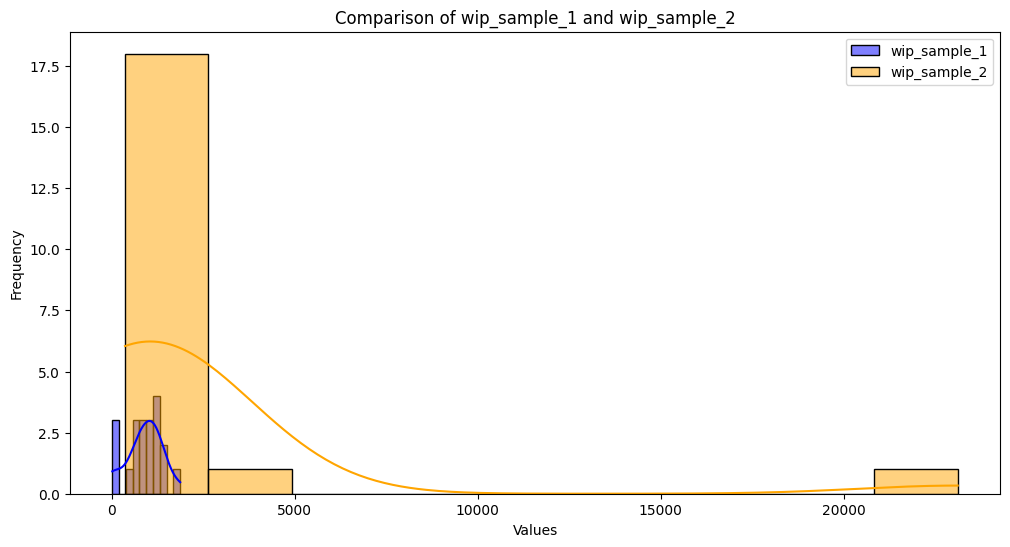

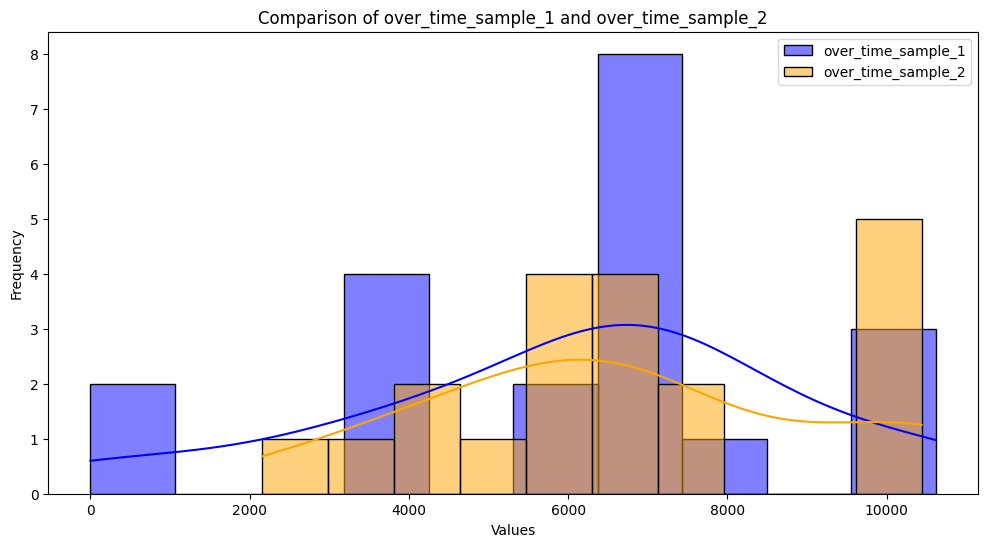

(                 Mean  Median   Mode    Range      Variance  \
 wip_sample_1   894.05   988.0   13.0   1855.0  2.371032e+05   
 wip_sample_2  2164.35  1014.5  360.0  22762.0  2.459390e+07   
 
               Standard Deviation  Inter-quartile Range  Skewness   Kurtosis  
 wip_sample_1          486.932447                 535.0 -0.326940  -0.219833  
 wip_sample_2         4959.224051                 444.5  4.058628  14.675079  ,
                       Mean  Median    Mode    Range      Variance  \
 over_time_sample_1  6060.0  6900.0  6960.0  10620.0  8.025821e+06   
 over_time_sample_2  6721.5  6750.0  4080.0   8280.0  6.337940e+06   
 
                     Standard Deviation  Inter-quartile Range  Skewness  \
 over_time_sample_1         2832.988008                3015.0 -0.481998   
 over_time_sample_2         2517.526512                2745.0  0.155848   
 
                     Kurtosis  
 over_time_sample_1 -0.101156  
 over_time_sample_2 -0.878673  )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot and compare two samples
def compare_samples(sample1, sample2, sample1_name, sample2_name):
    # Plotting distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(sample1, kde=True, color='blue', label=sample1_name, bins=10)
    sns.histplot(sample2, kde=True, color='orange', label=sample2_name, bins=10)
    plt.title(f"Comparison of {sample1_name} and {sample2_name}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Displaying statistics side-by-side
    stats_1 = calculate_statistics(sample1)
    stats_2 = calculate_statistics(sample2)

    comparison = pd.DataFrame([stats_1, stats_2], index=[sample1_name, sample2_name])
    return comparison

# Compare wip samples
wip_comparison = compare_samples(wip_sample_1, wip_sample_2, "wip_sample_1", "wip_sample_2")

# Compare over_time samples
over_time_comparison = compare_samples(over_time_sample_1, over_time_sample_2, "over_time_sample_1", "over_time_sample_2")

wip_comparison, over_time_comparison


In [ ]:
# Perform stratified random sampling
sample_size_per_quarter = 25  # 25 samples from each quarter
stratified_sample = data.groupby('quarter', group_keys=False).apply(lambda x: x.sample(sample_size_per_quarter, random_state=42))

# Print the sample
stratified_sample


<ipython-input-24-7d3d585ade34>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('quarter', group_keys=False).apply(lambda x: x.sample(sample_size_per_quarter, random_state=42))


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
487,1-Feb-15,Quarter1,sweing,Sunday,11.0,0.70,20.10,1192.0,6120.0,75.0,0.0,0.0,0.0,54.0,0.700509
35,1-Mar-15,Quarter1,sweing,Sunday,2.0,0.70,30.33,254.0,1800.0,0.0,0.0,0.0,0.0,58.0,0.683551
198,4-Mar-15,Quarter1,sweing,Wednesday,8.0,0.80,29.40,30.0,6840.0,0.0,0.0,0.0,0.0,57.0,0.433263
309,5-Jan-15,Quarter1,sweing,Monday,8.0,0.80,25.90,1047.0,6780.0,38.0,0.0,0.0,0.0,56.5,0.800684
554,5-Jan-15,Quarter1,sweing,Monday,3.0,0.75,19.87,944.0,6600.0,45.0,0.0,0.0,0.0,55.0,0.750243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,25-Feb-15,Quarter4,sweing,Wednesday,12.0,0.80,15.26,1053.0,4080.0,50.0,0.0,0.0,0.0,34.0,0.800402
623,28-Jan-15,Quarter4,sweing,Wednesday,10.0,0.80,22.52,1175.0,6720.0,60.0,0.0,0.0,0.0,56.0,0.850532
387,28-Feb-15,Quarter4,sweing,Saturday,9.0,0.75,18.79,841.0,6240.0,45.0,0.0,0.0,1.0,52.0,0.750396
38,28-Feb-15,Quarter4,sweing,Saturday,8.0,0.75,29.40,792.0,4560.0,56.0,0.0,0.0,2.0,58.0,0.750426


In [ ]:
# Create a sample of 60 values with 10 values from each day
sample_size_per_day = 10
days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
stratified_sample = data.groupby('day', group_keys=False).apply(lambda x: x.sample(sample_size_per_day, random_state=42))

# Print the sample
stratified_sample

<ipython-input-25-d12178828b66>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('day', group_keys=False).apply(lambda x: x.sample(sample_size_per_day, random_state=42))


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
459,9-Feb-15,Quarter2,sweing,Monday,4.0,0.70,30.10,767.0,3300.0,50.0,0.0,0.0,1.0,57.0,0.790003
46,23-Feb-15,Quarter4,sweing,Monday,3.0,0.70,29.40,1228.0,6960.0,30.0,0.0,0.0,2.0,58.0,0.700362
228,9-Feb-15,Quarter2,sweing,Monday,12.0,0.80,15.26,970.0,4080.0,63.0,0.0,0.0,0.0,34.0,0.800402
220,16-Feb-15,Quarter3,sweing,Monday,12.0,0.80,15.26,1079.0,3720.0,38.0,0.0,0.0,0.0,34.0,0.800312
72,9-Feb-15,Quarter2,sweing,Monday,8.0,0.35,30.10,901.0,6960.0,0.0,0.0,0.0,1.0,58.0,0.350302
271,12-Jan-15,Quarter2,sweing,Monday,10.0,0.80,50.48,381.0,6930.0,45.0,0.0,0.0,0.0,58.5,0.688558
630,26-Jan-15,Quarter4,sweing,Monday,10.0,0.75,22.52,1250.0,10080.0,55.0,0.0,0.0,0.0,56.0,0.800021
202,2-Mar-15,Quarter1,sweing,Monday,12.0,0.80,15.26,1035.0,4080.0,63.0,0.0,0.0,0.0,34.0,0.800402
374,2-Mar-15,Quarter1,sweing,Monday,6.0,0.75,18.79,947.0,2880.0,34.0,0.0,0.0,0.0,33.0,0.750797
73,9-Feb-15,Quarter2,sweing,Monday,7.0,0.35,30.10,842.0,6960.0,0.0,0.0,0.0,1.0,58.0,0.350302


In [ ]:
# Function for linear systematic sampling
def linear_systematic_sampling(data_column, sample_size):
    step = len(data_column) // sample_size
    return data_column[::step][:sample_size]

# Drop missing values to ensure valid sampling
wip_clean = data['wip'].dropna().reset_index(drop=True)
over_time_clean = data['over_time'].dropna().reset_index(drop=True)

# Linear systematic sampling for wip and over_time columns
wip_sys_sample_1 = linear_systematic_sampling(wip_clean, 20)
wip_sys_sample_2 = linear_systematic_sampling(wip_clean[1:], 20)  # Offset by 1 for the second sample

over_time_sys_sample_1 = linear_systematic_sampling(over_time_clean, 20)
over_time_sys_sample_2 = linear_systematic_sampling(over_time_clean[1:], 20)  # Offset by 1 for the second sample

# Combine results
linear_sys_samples = {
    'wip_sys_sample_1': wip_sys_sample_1.values,
    'wip_sys_sample_2': wip_sys_sample_2.values,
    'over_time_sys_sample_1': over_time_sys_sample_1.values,
    'over_time_sys_sample_2': over_time_sys_sample_2.values
}

linear_sys_samples


{'wip_sys_sample_1': array([ 834.,  950.,  609.,  925.,  323.,  986.,   30., 1083., 1232.,
        1216., 1180., 1206.,  762., 2120.,  754.,  976., 1025.,  944.,
        1388., 1134.]),
 'wip_sys_sample_2': array([ 157., 1562., 1061., 1382.,  901.,  990., 1169., 1094., 1150.,
         568.,  923., 1313., 1653., 1054.,  629., 1462., 1140.,  610.,
        1233., 1299.]),
 'over_time_sys_sample_1': array([ 1200.,  6960.,  3240.,  6660.,  4080.,  5490.,  6840.,   720.,
        10620., 10620.,  4560.,  6240.,  5040.,  5520.,  7020.,   240.,
        10170.,  6600.,  6720.,  6720.]),
 'over_time_sys_sample_2': array([ 5400.,  6960.,  6960., 10440.,  6480., 10350.,  6840.,  4080.,
        10170.,  9900.,  6840.,  5040.,  6240.,  3420.,  3240.,  4080.,
        10260.,  6480.,  6900.,  6840.])}

In [ ]:


# Define a function to calculate required statistics
def calculate_statistics(sample):
    return {
        'Mean': sample.mean(),
        'Median': sample.median(),
        'Mode': sample.mode().iloc[0] if not sample.mode().empty else None,
        'Range': sample.max() - sample.min(),
        'Variance': sample.var(),
        'Standard Deviation': sample.std(),
        'Inter-quartile Range': sample.quantile(0.75) - sample.quantile(0.25),
        'Skewness': skew(sample),
        'Kurtosis': kurtosis(sample)
    }

# Define a function to print statistics in the desired format
def print_statistics(title, stats):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in stats.items():
        print(f"{key}: {value}")

# Calculate statistics for all samples
samples = [wip_sample_1, wip_sample_2, over_time_sample_1, over_time_sample_2]
sample_names = ["WIP Sample 1", "WIP Sample 2", "Over_time Sample 1", "Over_time Sample 2"]

for i in range(len(samples)):
  sample_stats = calculate_statistics(samples[i])
  print_statistics(f"Statistics for {sample_names[i]}", sample_stats)



Statistics for WIP Sample 1
---------------------------
Mean: 894.05
Median: 988.0
Mode: 13.0
Range: 1855.0
Variance: 237103.2078947368
Standard Deviation: 486.93244695207653
Inter-quartile Range: 535.0
Skewness: -0.3269399641232975
Kurtosis: -0.21983297749413389

Statistics for WIP Sample 2
---------------------------
Mean: 2164.35
Median: 1014.5
Mode: 360.0
Range: 22762.0
Variance: 24593903.18684211
Standard Deviation: 4959.22405088156
Inter-quartile Range: 444.5
Skewness: 4.058627570760006
Kurtosis: 14.6750792177582

Statistics for Over_time Sample 1
---------------------------------
Mean: 6060.0
Median: 6900.0
Mode: 6960.0
Range: 10620.0
Variance: 8025821.052631579
Standard Deviation: 2832.9880078517062
Inter-quartile Range: 3015.0
Skewness: -0.4819978125475865
Kurtosis: -0.10115621606292047

Statistics for Over_time Sample 2
---------------------------------
Mean: 6721.5
Median: 6750.0
Mode: 4080.0
Range: 8280.0
Variance: 6337939.736842105
Standard Deviation: 2517.5265116463233
I

Statistical Comparison of wip_sys_sample_1 and wip_sys_sample_2:
   Statistic  wip_sys_sample_1  wip_sys_sample_2
0       Mean        983.850000       1067.500000
1     Median        981.000000       1117.000000
2       Mode         30.000000        157.000000
3      Range       2090.000000       1496.000000
4   Variance     174177.502632     133743.842105
5  Std. Dev.        417.345783        365.710052
6        IQR        370.500000        385.000000
7   Skewness          0.258119         -0.684192
8   Kurtosis          2.018566          0.252984


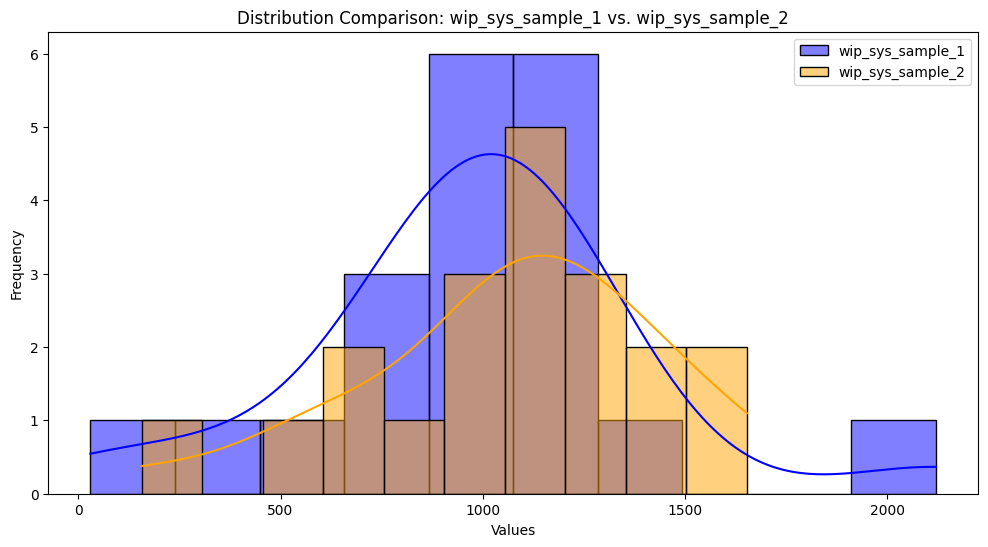

In [ ]:

# Compare two samples' statistics side by side
wip_comparison_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Range', 'Variance', 'Std. Dev.', 'IQR', 'Skewness', 'Kurtosis'],
    'wip_sys_sample_1': list(calculate_statistics(wip_sys_sample_1).values()),
    'wip_sys_sample_2': list(calculate_statistics(wip_sys_sample_2).values())
})

print("Statistical Comparison of wip_sys_sample_1 and wip_sys_sample_2:")
print(wip_comparison_stats)

# Visualization of distributions
plt.figure(figsize=(12, 6))
sns.histplot(wip_sys_sample_1, kde=True, color='blue', label='wip_sys_sample_1', bins=10)
sns.histplot(wip_sys_sample_2, kde=True, color='orange', label='wip_sys_sample_2', bins=10)
plt.title("Distribution Comparison: wip_sys_sample_1 vs. wip_sys_sample_2")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Statistical Comparison of over_time_sys_sample_1 and over_time_sys_sample_2:
   Statistic  over_time_sys_sample_1  over_time_sys_sample_2
0       Mean            5.763000e+03            6.846000e+03
1     Median            6.420000e+03            6.840000e+03
2       Mode            6.720000e+03            6.840000e+03
3      Range            1.038000e+04            7.200000e+03
4   Variance            8.547243e+06            5.436057e+06
5  Std. Dev.            2.923567e+03            2.331535e+03
6        IQR            2.430000e+03            2.385000e+03
7   Skewness           -1.984663e-01            2.376935e-01
8   Kurtosis           -2.997688e-01           -9.346914e-01


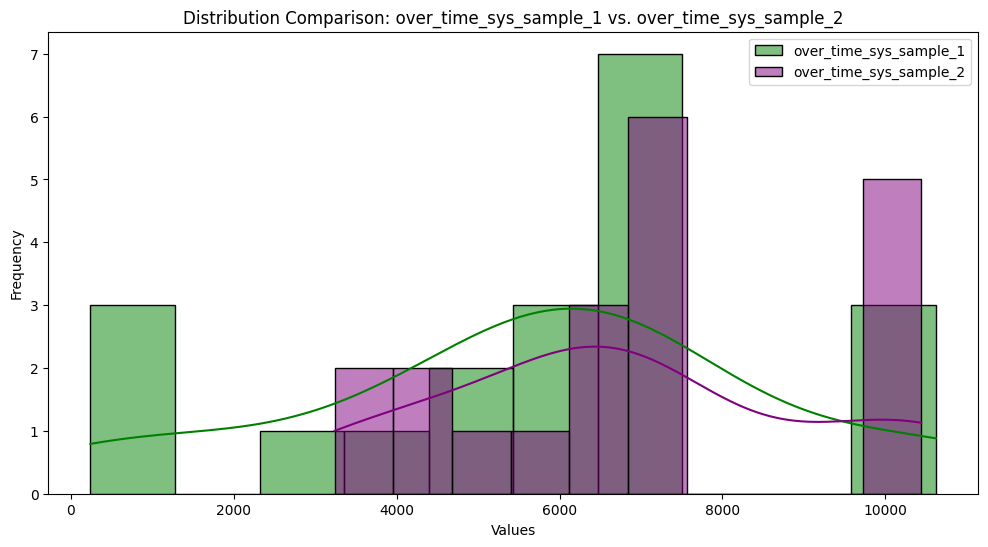

In [ ]:
# Compare two samples' statistics side by side
over_time_comparison_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Range', 'Variance', 'Std. Dev.', 'IQR', 'Skewness', 'Kurtosis'],
    'over_time_sys_sample_1': list(calculate_statistics(over_time_sys_sample_1).values()),
    'over_time_sys_sample_2': list(calculate_statistics(over_time_sys_sample_2).values())
})

print("Statistical Comparison of over_time_sys_sample_1 and over_time_sys_sample_2:")
print(over_time_comparison_stats)

# Visualization of distributions
plt.figure(figsize=(12, 6))
sns.histplot(over_time_sys_sample_1, kde=True, color='green', label='over_time_sys_sample_1', bins=10)
sns.histplot(over_time_sys_sample_2, kde=True, color='purple', label='over_time_sys_sample_2', bins=10)
plt.title("Distribution Comparison: over_time_sys_sample_1 vs. over_time_sys_sample_2")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()
